# Homework Assignment 2 - Chem 277B

**Breast Cancer Prediction**

Brent Allen Thorne

bathorne@berkeley.edu

## 1) Objective

Analyze the Breast Cancer Wisconsin dataset, classify cancer cells using Naive Bayes models, and evaluate performance using a confusion matrix.

<br>

## 2) Preparation

Before starting, import the necessary libraries for data analysis and visualization. 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

<br>

## 3) Dataset

Load the dataset from `sklearn`, which contains cell descriptors and a target variable (diagnosis: 0 = malignant, 1 = benign).

### think about this...

Let's not assign names and numerbers outside our model.

"I am not a number, I am a free man!" --Patrick McGoohan (as Number Six)

In [2]:
data, target = load_breast_cancer(return_X_y=True, as_frame=True)

In [3]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [5]:
type(target)

pandas.core.series.Series

Split the dataset into training (80%) and testing (20%) sets. Use `random_state=42` for reproducibility.

See also:  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
######## Fill in the code below ########
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size = 0.20, random_state=42)
########################################

print(f'Number of training samples: {X_train.shape[0]}')
print(f'- Number of malignant samples: {y_train[y_train==0].shape[0]} ({y_train[y_train==0].shape[0]/y_train.shape[0]*100:.1f}%)')
print(f'- Number of benign samples: {y_train[y_train==1].shape[0]} ({y_train[y_train==1].shape[0]/y_train.shape[0]*100:.1f}%)')
print(f'Number of test samples: {X_test.shape[0]}')
print(f'- Number of malignant samples: {y_test[y_test==0].shape[0]} ({y_test[y_test==0].shape[0]/y_test.shape[0]*100:.1f}%)')
print(f'- Number of benign samples: {y_test[y_test==1].shape[0]} ({y_test[y_test==1].shape[0]/y_test.shape[0]*100:.1f}%)')

Number of training samples: 455
- Number of malignant samples: 169 (37.1%)
- Number of benign samples: 286 (62.9%)
Number of test samples: 114
- Number of malignant samples: 43 (37.7%)
- Number of benign samples: 71 (62.3%)


### Dicsuss Class Imbalance

Note that we have a class imbalance with a benign class majority of ~62%.  Consider how to mitigated this thru resampling, class weights, synthetic data, custom metrics (precision, recall, f1-score, ROC-AUC), ...

think about this.
<br>

## 4) Visualize

Use the *mean radius* (the first feature) to create two histograms: one for malignant cells and one for benign cells. Overlay the two histograms to visualize the distribution of this feature for both classes. Discuss any similarities or differences.

<Figure size 640x480 with 0 Axes>

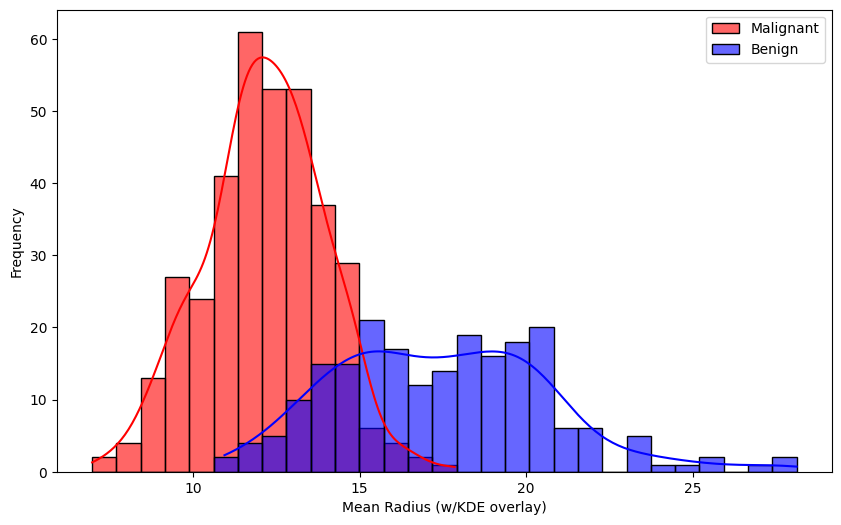

In [7]:
plt.figure()

######## Fill in the code below ########

# our target feature
feature = "mean radius"

# set to True to show density rather than frequency
density = False 

if density:
    stat='density' # normalize density
else:
    stat='count' # frequency

# bin count
#bins = 30 # navie
bins = np.linspace(data[feature].min(), data[feature].max(), 30)

# think about this...
#    to give a name, maps a dimension to an object
#       ...normalize and reduce geometry
# collect data by class
malignant = data[target == 1][feature]# collect data by class
benign = data[target == 0][feature]

# plot histograms
plt.figure(figsize=(10, 6))

# use matplotlib (not so pretty)
#plt.hist(malignant, bins=bins, alpha=0.6, label='Malignant', color='red', density=density)
#plt.hist(benign, bins=bins, alpha=0.6, label='Benign', color='blue', density=density)

# use seaborn
# kistogram with KDE overlays
sns.histplot(malignant, bins=bins, color='red', label='Malignant',
             kde=True, stat=stat, alpha=0.6)
sns.histplot(benign, bins=bins, color='blue', label='Benign',
             kde=True, stat=stat, alpha=0.6)

########################################

plt.xlabel('Mean Radius (w/KDE overlay)')
if density:
    plt.ylabel('Density')
else:
    plt.ylabel('Frequency')

plt.legend()
plt.show()

In [8]:
from scipy.stats import skew

skewness_value = skew(data['mean radius'])
skewness_value_malignant, skewness_value_benign = skew(malignant), skew(benign)
skewness_value, skewness_value_malignant, skewness_value_benign

(np.float64(0.9398934455576345),
 np.float64(-0.08344660198964893),
 np.float64(0.4983438269401485))

### Discuss Mean Radius Distribution

First off we believe that density is the more applicable histogram type due to the following observations:
 - We are comparing distributions with different sample sizes
 - We are interested in the shape, skew, and modality of our data.

However for this data set the frequency histogram is nearly identical and there is some merit in showing absolute sample size and the raw counts of samples in each bin.

As we noted above our dataset is moderately imbalanced thus the shape of our KDE(and histogram) matters more than the height.
The mean radius as a whole is right-skewed, however for the malignant set it's nearly symmeteric, while right-skewed for the benign set.
The benign set has a couple humps that might also indicate that it is bimodal.

Overall the KDE shows a clear sepration and thus "mean radius" might work well as a standalone feature for a linear model.

Also use the *mean fractal dimension* (the ninth feature) to create two histograms. Compare the distributions with those from the *mean radius*. Which feature appears to better separate the two classes?

<Figure size 640x480 with 0 Axes>

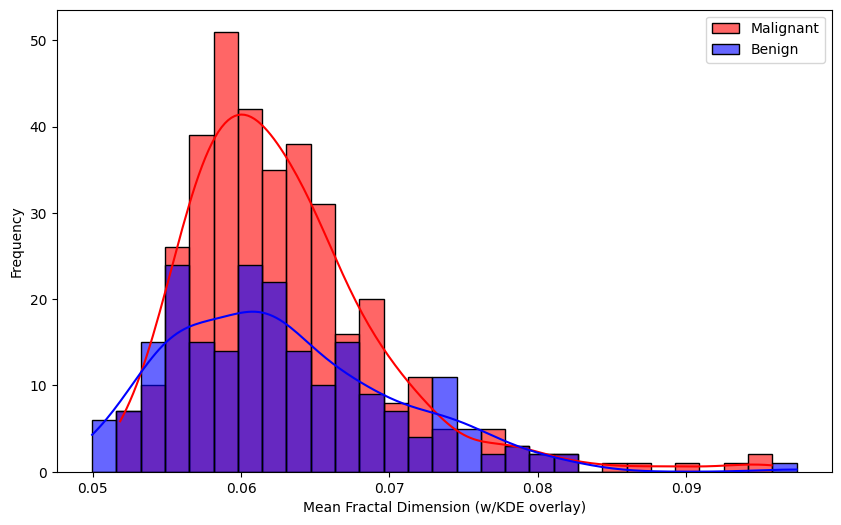

In [9]:
plt.figure()

######## Fill in the code below ########

# our target feature
feature = "mean fractal dimension"

# Set to true to show density rather than frequency
density = False 

if density:
    stat='density' # normalize density
else:
    stat='count' # frequency

# bin count
#bins = 30 # navie
bins = np.linspace(data[feature].min(), data[feature].max(), 30)

# collect data by class
malignant = data[target == 1][feature]
benign = data[target == 0][feature]

# plot histograms
plt.figure(figsize=(10, 6)) # we like to control our size directly

# use matplotlib (not quite so pretty)
#plt.hist(malignant, bins=bins, alpha=0.6, label='Malignant', color='red', density=density)
#plt.hist(benign, bins=bins, alpha=0.6, label='Benign', color='blue', density=density)

# use seaborn
# kistogram with KDE overlays
sns.histplot(malignant, bins=bins, color='red', label='Malignant',
             kde=True, stat=stat, alpha=0.6)
sns.histplot(benign, bins=bins, color='blue', label='Benign',
             kde=True, stat=stat, alpha=0.6)

########################################

plt.xlabel('Mean Fractal Dimension (w/KDE overlay)')
if density:
    plt.ylabel('Density')
else:
    plt.ylabel('Frequency')

plt.legend()
plt.show()

In [10]:
skewness_value = skew(data[feature])
skewness_value_malignant, skewness_value_benign = skew(malignant), skew(benign)
skewness_value, skewness_value_malignant, skewness_value_benign

(np.float64(1.3010473927890858),
 np.float64(1.64371971133231),
 np.float64(0.8884229914436466))

### Discuss Mean Fractal Dimension Distribution

Compare the distributions with those from the mean radius. Which feature appears to better separate the two classes?

Again our dataset is moderately imbalanced thus the shape of our KDE matters more than the height.
Both KDE overlap and are heavily right-skewed.
Since the KDE (and histogram) overlap there is not clear sepration thus while this may not be a useful feature for a linear model however it may still be useful in a combination with other features or in a non-linear model.

Clearly **mean radius** has better class separation as we have already noted above.

See: Going Further for a deeper exploration of correlation and actual contribution of each feature.

## 5) Naive Bayes Classification

Train a Gaussian Naive Bayes classifier using only **mean radius** and discuss its accuracy.

Accuracy using mean radius: 0.93


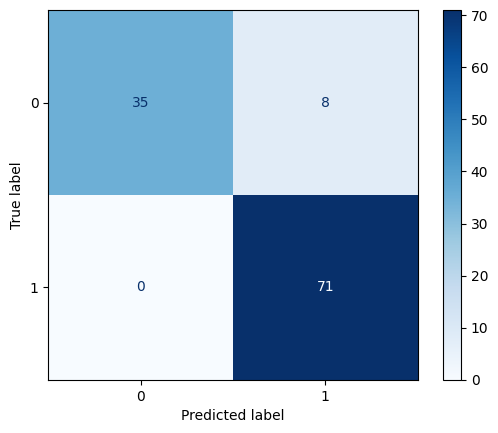

In [11]:
######## Fill in the code below ########

# our target feature
feature = "mean radius"

# scale data
scaler   = MinMaxScaler(feature_range = (0, 1)) 
# X_train_scaled  = scaler.fit_transform(X_train) # oops, that's all the features
X_train_scaled  = scaler.fit_transform(X_train[[feature]])

# Chew, chew... I'm a train!
gnb = GaussianNB()
Fit = gnb.fit(X_train_scaled, y_train)

# scale test data
X_test_scaled = scaler.transform(X_test[[feature]])

# predict our cleasses
y_pred = Fit.predict(X_test_scaled)
proba = Fit.predict_proba(X_test_scaled)
########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using mean radius: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [12]:
np.round(proba[:10], 3)

array([[0.096, 0.904],
       [0.997, 0.003],
       [0.589, 0.411],
       [0.092, 0.908],
       [0.065, 0.935],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.966, 0.034],
       [0.156, 0.844],
       [0.225, 0.775]])

In [13]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# classification report
print("\nClassification Report (mean radius):")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

# extract individual metrics for malignant class (label = 1)
malignant_precision = precision_score(y_test, y_pred, pos_label=1)
malignant_recall    = recall_score(y_test, y_pred, pos_label=1)
malignant_f1        = f1_score(y_test, y_pred, pos_label=1)

print(f"\nMalignant Class Metrics:")
print(f"Precision: {malignant_precision:.2f}")
print(f"Recall:    {malignant_recall:.2f}")
print(f"F1 Score:  {malignant_f1:.2f}")


Classification Report (mean radius):
              precision    recall  f1-score   support

      Benign       1.00      0.81      0.90        43
   Malignant       0.90      1.00      0.95        71

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114


Malignant Class Metrics:
Precision: 0.90
Recall:    1.00
F1 Score:  0.95


### Discuss Gaussian Naive Bayes Classifier (mean radius)

Okay, that worked better than we might have imagined.
The model picked up on the signal surprisingly well considering how simple Naive Bayes is. But we still ended up with 8 false negatives.
That means 8 malignant cases were misclassified as benign.

In a clinical setting, that’s a serious problem.
If a malignant tumor goes undetected, the patient might not receive treatment in time.
The disease could progress, and the consequences could be severe. In this context, missing a positive case is more dangerous than flagging a benign one by mistake.
Early intervention is key, so minimizing false negatives must be a top priority.

Train another Gaussian Naive Bayes classifier using only *mean fractal dimension* and discuss its accuracy.

Accuracy using mean fractal dimension: 0.62


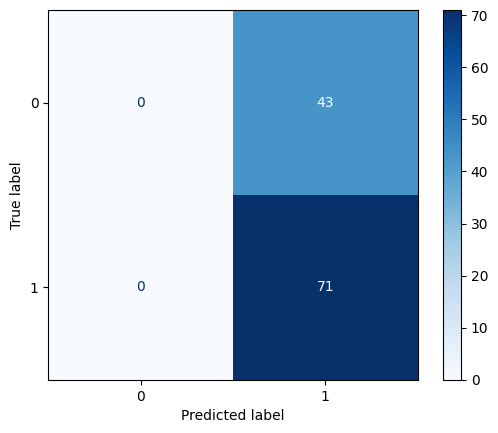

In [14]:
######## Fill in the code below ########
# our target feature
feature = "mean fractal dimension"

# scale data
scaler   = MinMaxScaler(feature_range = (0, 1)) 
# X_train_scaled  = scaler.fit_transform(X_train) # oops, that's all the features
X_train_scaled  = scaler.fit_transform(X_train[[feature]])

# Chew, chew... I'm a train!
gnb = GaussianNB()
Fit = gnb.fit(X_train_scaled, y_train)

# scale test data
X_test_scaled = scaler.transform(X_test[[feature]])

# predict our classes
y_pred = Fit.predict(X_test_scaled)
proba = Fit.predict_proba(X_test_scaled)

########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using mean fractal dimension: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [15]:
np.round(proba[:10], 3)

array([[0.35 , 0.65 ],
       [0.384, 0.616],
       [0.364, 0.636],
       [0.37 , 0.63 ],
       [0.356, 0.644],
       [0.365, 0.635],
       [0.353, 0.647],
       [0.353, 0.647],
       [0.36 , 0.64 ],
       [0.379, 0.621]])

In [16]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# classification report
print("\nClassification Report (mean fractal dimension):")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"], zero_division=0))

# extract individual metrics for malignant class (label = 1)
malignant_precision = precision_score(y_test, y_pred, pos_label=1)
malignant_recall    = recall_score(y_test, y_pred, pos_label=1)
malignant_f1        = f1_score(y_test, y_pred, pos_label=1)

print(f"\nMalignant Class Metrics:")
print(f"Precision: {malignant_precision:.2f}")
print(f"Recall:    {malignant_recall:.2f}")
print(f"F1 Score:  {malignant_f1:.2f}")


Classification Report (mean fractal dimension):
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00        43
   Malignant       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114


Malignant Class Metrics:
Precision: 0.62
Recall:    1.00
F1 Score:  0.77


### Discuss Gaussian Naive Bayes Classifier (mean fractal dimension)

Well, that went about as expected.  The model collapsed to predicting only the majority class, which is a common failure mode seen in imbalanced classification tasks.  Every malignant case was caught, but at the cost of misclassifying benign ones. As we already noted, **mean fractal dimension** has poor separability between classes, and class imbalance lead to the model overfitting to the dominant class. 

Also train a Gaussian Naive Bayes classifier using both *mean radius* and *mean fractal dimension* and evaluate its accuracy. Don't forget to scale the features now! How does this compare to the previous two models?

Accuracy using mean radius and mean fractal dimension: 0.93


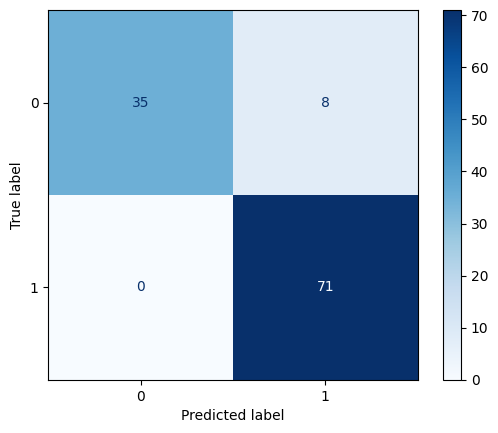

In [17]:
######## Fill in the code below ########

# our target feature (we are very lazy)
features = ["mean radius", "mean fractal dimension"]  

# scale data
scaler   = MinMaxScaler(feature_range = (0, 1)) 
X_train_scaled  = scaler.fit_transform(X_train[features])

# Chew, chew... I'm a train!
gnb = GaussianNB()
Fit = gnb.fit(X_train_scaled, y_train)

# scale test data
X_test_scaled = scaler.transform(X_test[features])

# predict our classes
y_pred = Fit.predict(X_test_scaled)
proba = Fit.predict_proba(X_test_scaled)

########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using mean radius and mean fractal dimension: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [18]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# classification report
print("\nClassification Report (both mean radius and mean fractal dimension):")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"], zero_division=0))

# extract individual metrics for malignant class (label = 1)
malignant_precision = precision_score(y_test, y_pred, pos_label=1)
malignant_recall    = recall_score(y_test, y_pred, pos_label=1)
malignant_f1        = f1_score(y_test, y_pred, pos_label=1)

print(f"\nMalignant Class Metrics:")
print(f"Precision: {malignant_precision:.2f}")
print(f"Recall:    {malignant_recall:.2f}")
print(f"F1 Score:  {malignant_f1:.2f}")


Classification Report (both mean radius and mean fractal dimension):
              precision    recall  f1-score   support

      Benign       1.00      0.81      0.90        43
   Malignant       0.90      1.00      0.95        71

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114


Malignant Class Metrics:
Precision: 0.90
Recall:    1.00
F1 Score:  0.95


### Discuss Gaussian Naive Bayes Classifier (both "mean radius" and "mean fractal dimension")

Our predictions are no better with or without "mean fractal dimension".
This means that only the "mean radius" feature is providing any information to the model.

Lastly, train a Gaussian Naive Bayes classifier using all 30 features and evaluate its accuracy. Compare the performance of this model to the previous models.

Accuracy using all features: 0.96


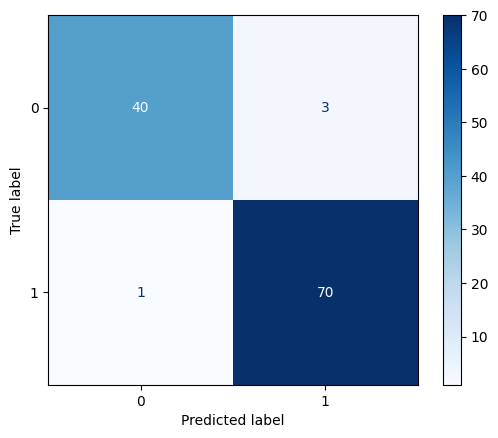

In [19]:
######## Fill in the code below ########

# scale data
scaler   = MinMaxScaler(feature_range = (0, 1)) 
X_train_scaled  = scaler.fit_transform(X_train)

# Chew, chew... I'm a train!
gnb = GaussianNB()
Fit = gnb.fit(X_train_scaled, y_train)

# scale test data
X_test_scaled = scaler.transform(X_test)

# predict our classes
y_pred = Fit.predict(X_test_scaled)
proba = Fit.predict_proba(X_test_scaled)

########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using all features: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [20]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# classification report
print("\nClassification Report (all features):")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"], zero_division=0))

# extract individual metrics for malignant class (label = 1)
malignant_precision = precision_score(y_test, y_pred, pos_label=1)
malignant_recall    = recall_score(y_test, y_pred, pos_label=1)
malignant_f1        = f1_score(y_test, y_pred, pos_label=1)

print(f"\nMalignant Class Metrics:")
print(f"Precision: {malignant_precision:.2f}")
print(f"Recall:    {malignant_recall:.2f}")
print(f"F1 Score:  {malignant_f1:.2f}")


Classification Report (all features):
              precision    recall  f1-score   support

      Benign       0.98      0.93      0.95        43
   Malignant       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Malignant Class Metrics:
Precision: 0.96
Recall:    0.99
F1 Score:  0.97


### Discuss Gaussian Naive Bayes Classifier (all feature)
Okay, that worked better than I imagined. The model picked up on the signal surprisingly well considering how simple Naive Bayes is. But we still ended up with 3 (down from 8) false negatives. That means three malignant cases were misclassified as benign.

While our model has greatly improved this remains a serious problem, becuase if a malignant tumor goes undetected, the patient might not receive treatment in time.
We might improve our model by favoring false positives over false negatives.

<br>

## 6) Feature Analysis


One assumption of Naive Bayes is that the features are mutually independent. Generate a heatmap of Pearsons (pairwise) correlation coefficient. Which features correlate? Does the correlation make sense?

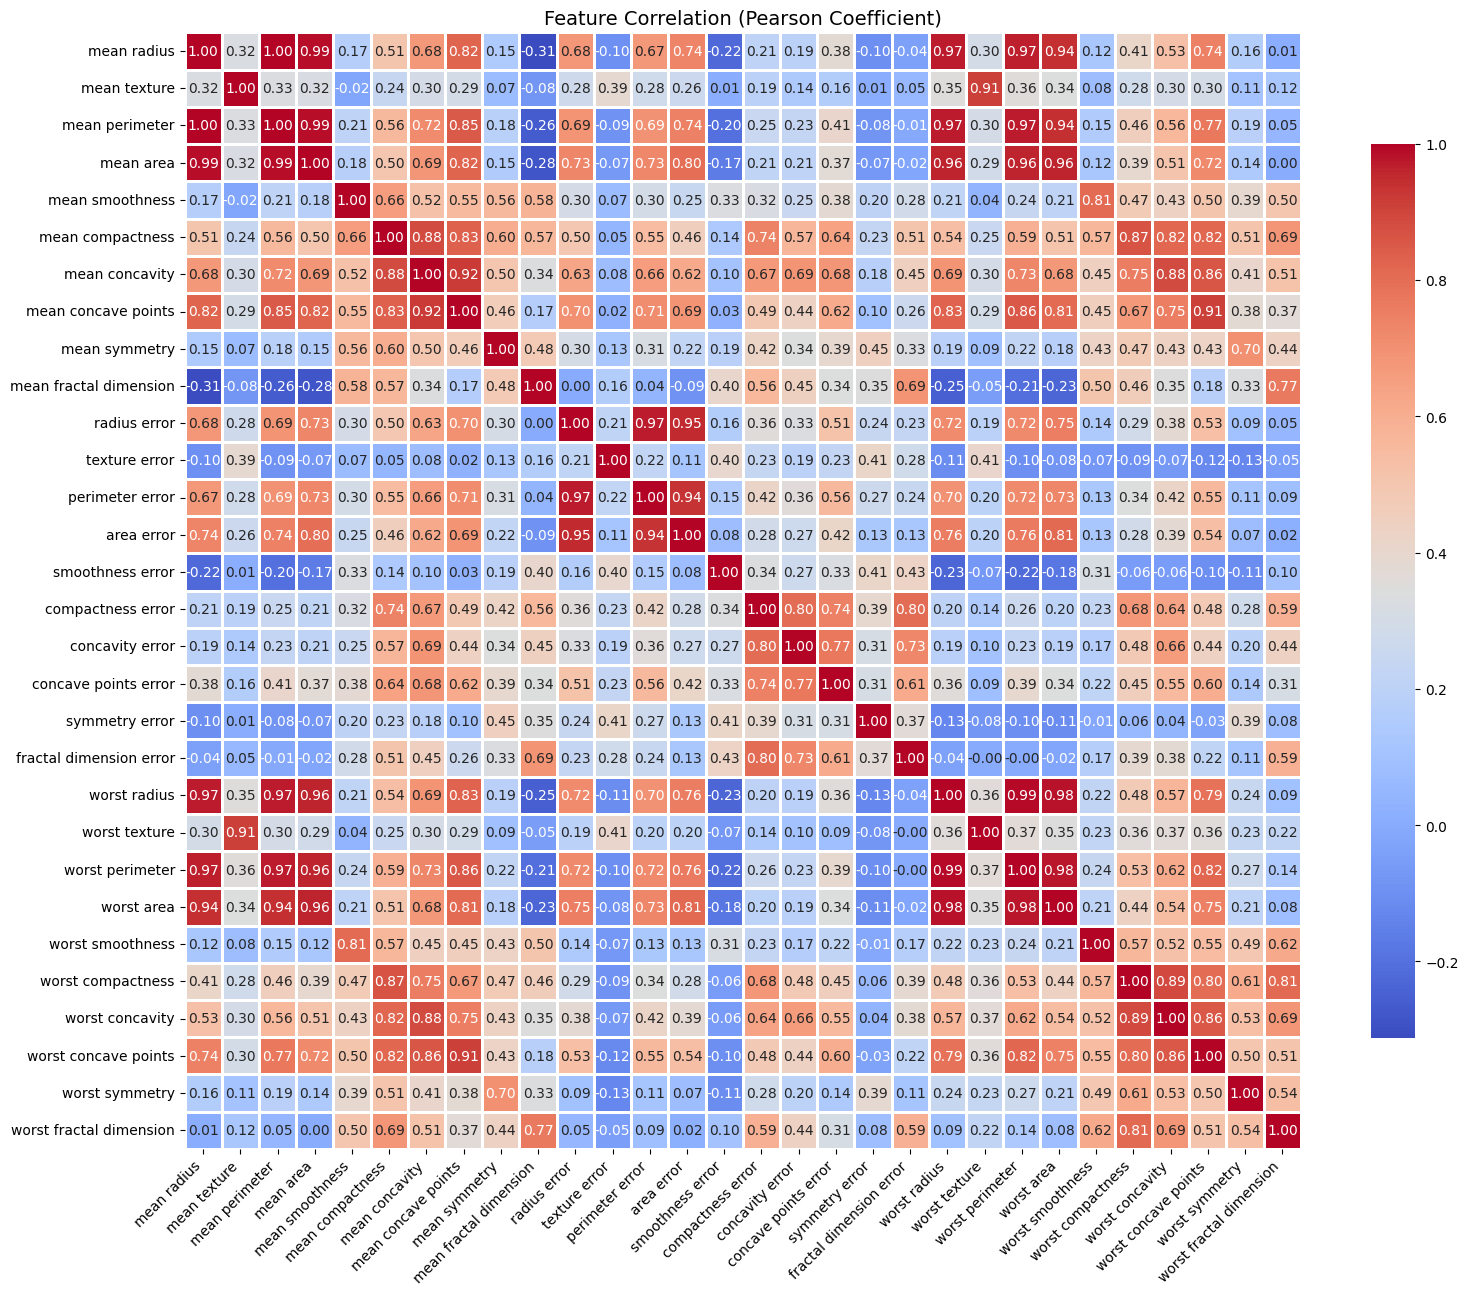

In [21]:
######## Fill in the code below ########

# compute our correlation matrix
corr_matrix = data.corr(method='pearson')

# plot
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .7}, linewidths=0.9)

plt.title("Feature Correlation (Pearson Coefficient)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
########################################

In [22]:
# Heatmaps this size are next to useless!
# Let's fix this with a Class to do Feature Correlation.

class FeatureCorrelation:
    def __init__(self, df):
        self.df = df
        self.corr_matrix = df.corr().abs()
        self.upper_triangle = self.corr_matrix.where(
            np.triu(np.ones(self.corr_matrix.shape), k=1).astype(bool)
        )

    def print_sorted(self, min_threshold=0.0, absolute=True):
        """
        Print pairwise correlations above a threshold, sorted descending.
        
        Parameters:
            min_threshold (float): Minimum correlation to display.
            absolute (bool): If True, sort by absolute correlation. If False, sort by raw correlation.
        """
        matrix = self.upper_triangle if absolute else self.df.corr().where(
            np.triu(np.ones(self.df.shape[1]), k=1).astype(bool)
        )
    
        sorted_corrs = (
            matrix.stack()
            .sort_values(key=lambda x: abs(x) if absolute else x, ascending=False)
            .loc[lambda x: abs(x) >= min_threshold if absolute else x.abs() >= min_threshold]
        )
    
        for (feat1, feat2), corr in sorted_corrs.items():
            print(f"{corr:.2f}: {feat1} vs {feat2}")

    def get_uncorrelated(self, threshold=0.95):
        """Return a set of features with no strong pairwise correlation."""
        to_drop = set()
        for col in self.upper_triangle.columns:
            correlated = self.upper_triangle[col][self.upper_triangle[col] >= threshold].index
            to_drop.update(correlated)
        return set(self.df.columns) - to_drop

    def get_highest_correlations(self, n=10, min_threshold=0.0):
        """Return top N highest correlated feature pairs above a threshold."""
        sorted_corrs = (
            self.upper_triangle.stack()
            .sort_values(ascending=False)
            .loc[lambda x: x >= min_threshold]
        )
        return sorted_corrs.head(n)

    def get_features_to_drop(self, threshold=0.95, report=False):
        """
        Return a list of features to drop based on pairwise correlation.
        For each correlated pair above the threshold, drop the second feature.
        """
        to_drop = set()
        for col in self.upper_triangle.columns:
            correlated = self.upper_triangle[col][self.upper_triangle[col] >= threshold].index
            for other in correlated:
                if other not in to_drop:
                    to_drop.add(other)
                    if report:
                        corr_value = self.corr_matrix.loc[col, other]
                        print(f"{corr_value:.2f}: drop '{other}' (correlated with '{col}')")
        return list(to_drop)

In [23]:
fc = FeatureCorrelation(data)

# print all correlations above a threshold
fc.print_sorted(min_threshold=0.80, absolute=False)

1.00: mean radius vs mean perimeter
0.99: worst radius vs worst perimeter
0.99: mean radius vs mean area
0.99: mean perimeter vs mean area
0.98: worst radius vs worst area
0.98: worst perimeter vs worst area
0.97: radius error vs perimeter error
0.97: mean perimeter vs worst perimeter
0.97: mean radius vs worst radius
0.97: mean perimeter vs worst radius
0.97: mean radius vs worst perimeter
0.96: mean area vs worst radius
0.96: mean area vs worst area
0.96: mean area vs worst perimeter
0.95: radius error vs area error
0.94: mean perimeter vs worst area
0.94: mean radius vs worst area
0.94: perimeter error vs area error
0.92: mean concavity vs mean concave points
0.91: mean texture vs worst texture
0.91: mean concave points vs worst concave points
0.89: worst compactness vs worst concavity
0.88: mean concavity vs worst concavity
0.88: mean compactness vs mean concavity
0.87: mean compactness vs worst compactness
0.86: mean concavity vs worst concave points
0.86: mean concave points vs w

In [24]:
# get features with no correlation above 0.95
uncorrelated = fc.get_uncorrelated(threshold=0.95)
print("\nUncorrelated features:")
print(sorted(uncorrelated))


Uncorrelated features:
['area error', 'compactness error', 'concave points error', 'concavity error', 'fractal dimension error', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'mean smoothness', 'mean symmetry', 'mean texture', 'perimeter error', 'smoothness error', 'symmetry error', 'texture error', 'worst area', 'worst compactness', 'worst concave points', 'worst concavity', 'worst fractal dimension', 'worst smoothness', 'worst symmetry', 'worst texture']


In [25]:
print("\nHighly correlated features:")
print(fc.get_highest_correlations(n=3))


Highly correlated features:
mean radius   mean perimeter     0.997855
worst radius  worst perimeter    0.993708
mean radius   mean area          0.987357
dtype: float64


In [26]:
# find features to drop (correlation above a threshold) 
features_to_drop = fc.get_features_to_drop(threshold=0.98, report=True)

print("\nRecommended features to drop:")
print(features_to_drop)

1.00: drop 'mean radius' (correlated with 'mean perimeter')
0.99: drop 'mean perimeter' (correlated with 'mean area')
0.99: drop 'worst radius' (correlated with 'worst perimeter')

Recommended features to drop:
['mean radius', 'mean perimeter', 'worst radius']


### Discussion Feature Correlation

I've always found correlation matrix heatmap completely useless.
Using a heatmap on an unsort correlation matrix is whizbang garbage and hardly provides any useful information.

It's my deepest desire to bring peace to the world, feed the people and sure, cure cancer.
To this end I've created the FeatureCorrelation Class.
Feel free to share it!!!

Now, let's stop using correlation matrix heatmap altogether and maybe make the world a better place.
Let's continue to think about how to improve this Class.
Maybe we'll see this merged into main-line Pandas so time soon.

Anyway if it wasn't obvious above, here are a top ten most highly correlated features.

```
Highly correlated features:
mean radius      mean perimeter     0.997855
worst radius     worst perimeter    0.993708
mean radius      mean area          0.987357
mean perimeter   mean area          0.986507
worst radius     worst area         0.984015
worst perimeter  worst area         0.977578
radius error     perimeter error    0.972794
mean perimeter   worst perimeter    0.970387
mean radius      worst radius       0.969539
mean perimeter   worst radius       0.969476
```

The strongest correlations reflect geometric relationships: radius, perimeter, and area are inherently linked.
High redundancy between mean and worst metrics is expected, given they summarize similar measurements.
Error metrics correlate closely with their related feature measurements (ie. mean area and area error) due to shared derivation.
Shape descriptors like compactness, concavity, and concave points also cluster together.
Overall, the data shows strong correlation within feature catorgories such as geometric features, error terms, shape descriptors, and statistical metrics.

Remove three of the features that show high correlation with another feature and run the analysis you did in 5) again. Compare the accuray to the value you optain when you include all features.

Accuracy using all features: 0.95


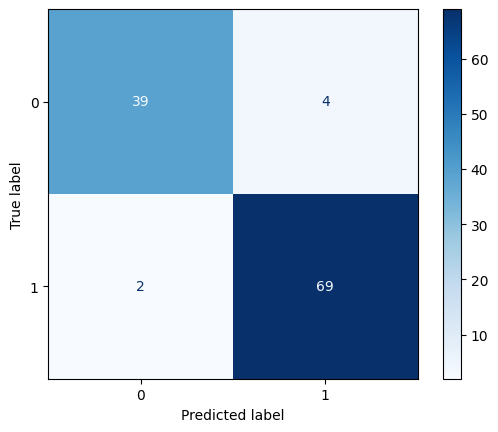

In [27]:
######## Fill in the code below ########

# features to exclude
drop_features = ['mean radius', 'mean perimeter', 'worst radius']

# drop from training and test sets
X_train_reduced = X_train.drop(columns=drop_features)
X_test_reduced  = X_test.drop(columns=drop_features)

# scale data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled  = scaler.transform(X_test_reduced)

# train model
gnb = GaussianNB()
Fit = gnb.fit(X_train_scaled, y_train)

# predict classes
y_pred = Fit.predict(X_test_scaled)
proba  = Fit.predict_proba(X_test_scaled)

########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using all features: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [28]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# classification report
print("\nClassification Report (both mean radius and mean fractal dimension):")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"], zero_division=0))

# extract individual metrics for malignant class (label = 1)
malignant_precision = precision_score(y_test, y_pred, pos_label=1)
malignant_recall    = recall_score(y_test, y_pred, pos_label=1)
malignant_f1        = f1_score(y_test, y_pred, pos_label=1)

print(f"\nMalignant Class Metrics:")
print(f"Precision: {malignant_precision:.2f}")
print(f"Recall:    {malignant_recall:.2f}")
print(f"F1 Score:  {malignant_f1:.2f}")


Classification Report (both mean radius and mean fractal dimension):
              precision    recall  f1-score   support

      Benign       0.95      0.91      0.93        43
   Malignant       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Malignant Class Metrics:
Precision: 0.95
Recall:    0.97
F1 Score:  0.96


### Discussion Feature Engineering

Actaully our model has become slightly worse off.
With all features we had a recall of 0.99 but now it's only 0.97 for the malignant class.
Basically this is because we are dropping simply based on correlation rather than based on actaul contribution.

## Going Further

Let's find the features that actaully contribute.
We are going to be a bit silly and use RandomForestClassifier() to find the feature then use GaussianNB() as our model.

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# fit model to rank features
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# select our important features
selector = SelectFromModel(rf, threshold="median", prefit=True)
selector.fit(X_train, y_train)

# transform using fitted selector
X_train_selected = selector.transform(X_train)
X_test_selected  = selector.transform(X_test)

Accuracy using all features: 0.97


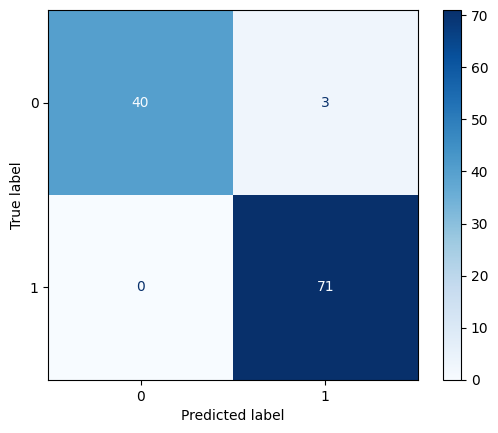

In [30]:
# scale data
scaler   = MinMaxScaler(feature_range = (0, 1)) 
X_train_scaled  = scaler.fit_transform(X_train_selected)

# Chew, chew... I'm a train!
gnb = GaussianNB()
Fit = gnb.fit(X_train_scaled, y_train)

# scale test data
X_test_scaled = scaler.transform(X_test_selected)

# predict our classes
y_pred = Fit.predict(X_test_scaled)
proba = Fit.predict_proba(X_test_scaled)

########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using all features: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [31]:
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']


In [32]:
len(selected_features)

15

In [33]:
len(data.columns.tolist())

30

Okay, let's try not being so goofy and use a RandomForestClassifier() directly...

Accuracy using all features: 0.96


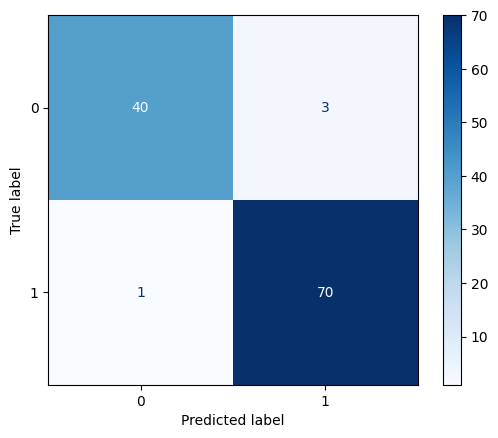

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# scale data (probably not strictly needed for Random Forest)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# predict classes
y_pred = rf.predict(X_test_scaled)
proba  = rf.predict_proba(X_test_scaled)

# evaluate
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using all features: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Shoot, no better.

In [35]:
import pandas as pd

# get feature importances
importances = rf.feature_importances_

# match column names
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# show it
print(importance_df)

                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fractal dimension    0.005210


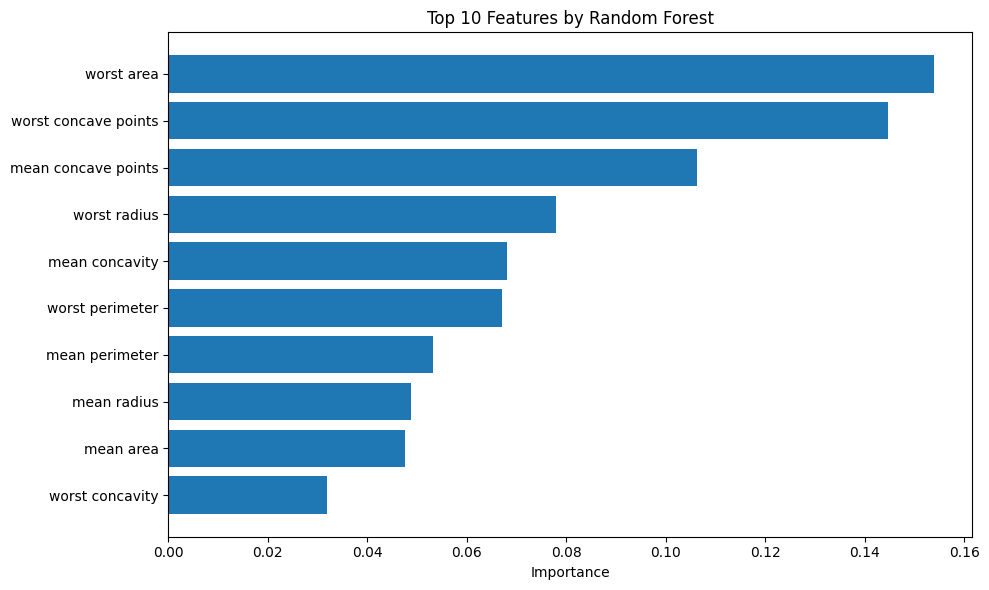

In [36]:
import matplotlib.pyplot as plt

top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n][::-1], importance_df['Importance'][:top_n][::-1])
plt.xlabel("Importance")
plt.title(f"Top {top_n} Features by Random Forest")
plt.tight_layout()
plt.show()

Let's try SVC with grid search now...

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Accuracy using all features (SVM): 0.97


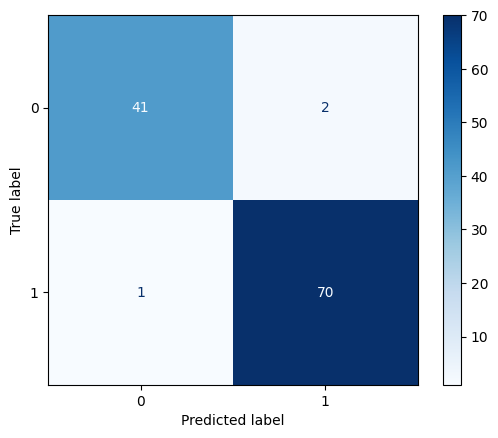

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# scale data (this is required for SVM)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# train SVM model, chew chew!
svm = SVC(kernel='rbf', probability=True, C=1, gamma='scale', class_weight='balanced', random_state=42) # now with class_weight sparkle power!!! (no effect, btw)
svm.fit(X_train_scaled, y_train)

# predict classes
y_pred = svm.predict(X_test_scaled)
proba  = svm.predict_proba(X_test_scaled)

# evaluate
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using all features (SVM): {accuracy:.2f}')

# plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Well that's something.  We saved one more life, so that was totally worth it!  ;-)

Or have we?  Maybe we are leaking test set information into our model...

We ought to try resampling and class weights now.

...no improvement with class weights and SMOTE resampling resulted in mode collapse.

Think about this.

In [39]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# classification report
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"], zero_division=0))

# extract individual metrics for malignant class (label = 1)
malignant_precision = precision_score(y_test, y_pred, pos_label=1)
malignant_recall    = recall_score(y_test, y_pred, pos_label=1)
malignant_f1        = f1_score(y_test, y_pred, pos_label=1)

print(f"\nMalignant Class Metrics:")
print(f"Precision: {malignant_precision:.2f}")
print(f"Recall:    {malignant_recall:.2f}")
print(f"F1 Score:  {malignant_f1:.2f}")


Classification Report (SVM):
              precision    recall  f1-score   support

      Benign       0.98      0.95      0.96        43
   Malignant       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Malignant Class Metrics:
Precision: 0.97
Recall:    0.99
F1 Score:  0.98


Could we've done better with more data?

Consider wrapping up our repetitious modelling code.

Try `ComplementNB()`... probably not applicable as we have continous data.

Accuracy using ComplementNB: 0.86


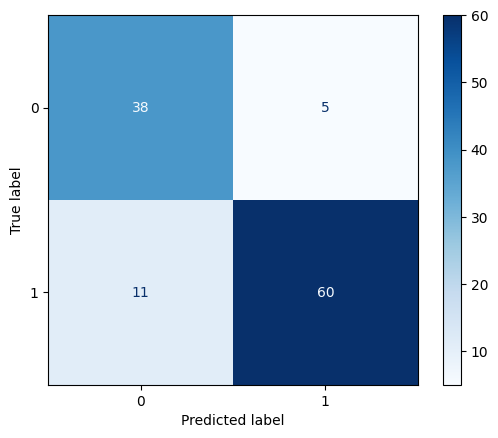

In [40]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# scale data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# train model, chew chew!
model = ComplementNB()
model.fit(X_train_scaled, y_train)

# predict classes
y_pred = model.predict(X_test_scaled)
proba  = model.predict_proba(X_test_scaled)

# evaluate
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using ComplementNB: {accuracy:.2f}')

# plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

That's about what we thought... `ComplementNB` expects count-based features.

see: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/naive_bayes.py